FITS EXAMPLES 

In [44]:

import matplotlib.pyplot as pl
import numpy as np

In [45]:
from astropy.io import fits
fits_image_filename = fits.util.get_testdata_filepath('test0.fits')
hdu= fits.open(fits_image_filename)
hdu= fits.open('COM_CMB_IQU-sevem_1024_R2.02_full.fits')
#print(hdu)
hdu.info()

Filename: COM_CMB_IQU-sevem_1024_R2.02_full.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      16   ()      
  1  COMP-MAP      1 BinTableHDU     61   12582912R x 5C   [E, E, E, B, B]   
  2  BEAMTF        1 BinTableHDU     45   3101R x 2C   [E, E]   


In [69]:
# accedemos al header y data de cada extensión, en muchas ocasiones no hay datos en la extensión primaria y hay una cabecera global
NAXIS=hdu[1].header[2]
ord=hdu[1].header['ORDERING'] 
ord=headerMaps['ORDERING']
TempMap=maps[0]
TempMap=hdu[1].data[0]


In [71]:
maps=hdu['COMP-MAP'].data
maps
beam=hdu[2].data
beam

FITS_rec([(1.0, 1.0), (0.99999845, 0.99999845), (0.99999541, 0.99999541), ...,
       (0.00065883575, 0.0), (0.00065572758, 0.0), (0.00065263303, 0.0)], 
      dtype=(numpy.record, [('INT_BEAM', '>f4'), ('POL_BEAM', '>f4')]))

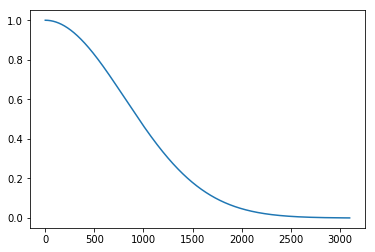

In [74]:
bl=beam.field('INT_BEAM')
pl.plot(bl)

In [64]:
mapaT=hdu[1].data.field(0)
mapaT=hdu[1].data.field(0)
mapaT=hdu[1].data.field('I_STOKES')
import healpy as hp
hp.mollview(mapa,min=-0.0003,max=0.0003,nest=True,title='SEVEM Temperture map') # recordad que mapas de PLANCK están en nested 

TypeError: 'FITS_rec' object is not callable

In [42]:
# podemos añadir anotaciones, cambiar nombre de alguna columna, etc
hdr=hdu[1].header  
hdr['TTYPE1']='TEMPERATURE MAP'  
hdr.set('experiment','Planck')
hdr['observer']='you'
hdr

XTENSION= 'BINTABLE'           /Written by IDL:  Fri Jul 17 15:01:18 2015       
BITPIX  =                    8 /                                                
NAXIS   =                    2 /Binary table                                    
NAXIS1  =                   14 /Number of bytes per row                         
NAXIS2  =             12582912 /Number of rows                                  
PCOUNT  =                    0 /Random parameter count                          
GCOUNT  =                    1 /Group count                                     
TFIELDS =                    5 /Number of columns                               
COMMENT                                                                         
COMMENT  *** End of mandatory fields ***                                        
COMMENT                                                                         
EXTVER  =                    1 /Extension version                               
DATE    = '2015-07-17'      

In [56]:
hdu[1].header =hdr
hdu[2].data

FITS_rec([(1.0, 1.0), (0.99999845, 0.99999845), (0.99999541, 0.99999541), ...,
       (0.00065883575, 0.0), (0.00065572758, 0.0), (0.00065263303, 0.0)], 
      dtype=(numpy.record, [('INT_BEAM', '>f4'), ('POL_BEAM', '>f4')]))

In [31]:
tab = fits.util.get_testdata_filepath('tb.fits')
fits.info(tab)

Filename: /anaconda2/envs/Python3/lib/python3.7/site-packages/astropy/io/fits/tests/data/tb.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      11   ()      
  1                1 BinTableHDU     24   2R x 4C   [1J, 3A, 1E, 1L]   


In [57]:
hdutab=fits.open(tab)

In [58]:
table=hdutab[1].data
hdutab[1].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / 8-bit bytes                                    
NAXIS   =                    2 / 2-dimensional binary table                     
NAXIS1  =                   12 / width of table in bytes                        
NAXIS2  =                    2                                                  
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group (required keyword)              
TFIELDS =                    4                                                  
TTYPE1  = 'c1      '           / label for field   1                            
TFORM1  = '1J      '           / data format of field: 4-byte INTEGER           
TTYPE2  = 'c2      '           / label for field   2                            
TFORM2  = '3A      '           / data format of field: ASCII Character          
TTYPE3  = 'c3      '        

In [61]:
cols=hdutab[1].columns
cols.info()

name:
    ['c1', 'c2', 'c3', 'c4']
format:
    ['1J', '3A', '1E', '1L']
unit:
    ['', '', '', '']
null:
    [-2147483647, '', '', '']
bscale:
    ['', '', 3, '']
bzero:
    ['', '', 0.4, '']
disp:
    ['I11', 'A3', 'G15.7', 'L6']
start:
    ['', '', '', '']
dim:
    ['', '', '', '']
coord_type:
    ['', '', '', '']
coord_unit:
    ['', '', '', '']
coord_ref_point:
    ['', '', '', '']
coord_ref_value:
    ['', '', '', '']
coord_inc:
    ['', '', '', '']
time_ref_pos:
    ['', '', '', '']


In [63]:
# table in ascii
from astropy.io import ascii
table=ascii.read('sources.dat')
table

obsid,redshift,X,Y,object
int64,float64,int64,int64,str11
3102,0.32,4167,4085,Q1250+568-A
877,0.22,4378,3892,Source 82


In [1]:
## EXERCICE

from astropy.utils.data import download_file
image_file = download_file('http://data.astropy.org/tutorials/FITS-images/HorseHead.fits', cache=True )

In [4]:

import matplotlib.pyplot as pl
image_file

u'/Users/casaponsa/.astropy/cache/download/py2/2c9202ae878ecfcb60878ceb63837f5f'

In [5]:
from astropy.io import fits
hdu=fits.open(image_file)

In [6]:
hdu.info()

Filename: /Users/casaponsa/.astropy/cache/download/py2/2c9202ae878ecfcb60878ceb63837f5f
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     161   (891, 893)   int16   
  1  er.mask       1 TableHDU        25   1600R x 4C   [F6.2, F6.2, F6.2, F6.2]   


In [12]:
import numpy as np
map=hdu[1].data
np.shape(map)


(1600,)

In [9]:
map

array([[ 7201,  6642,  6642, ...,  9498,  9498, 10057],
       [ 6642,  6363,  6642, ..., 10057, 10616, 10616],
       [ 6922,  6642,  6922, ..., 10337, 11175, 10616],
       ...,
       [ 5412,  5132,  5412, ..., 13000, 12580, 12021],
       [ 5796,  5517,  5796, ..., 12546, 12546, 11987],
       [ 5796,  5796,  6076, ..., 11987, 12546, 12546]], dtype=int16)